In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emissions-by-country/co2_emissions_kt_by_country.csv


Data Preview:


,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB
None

Number of Countries: 256
Year Range: 1960 - 2019


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


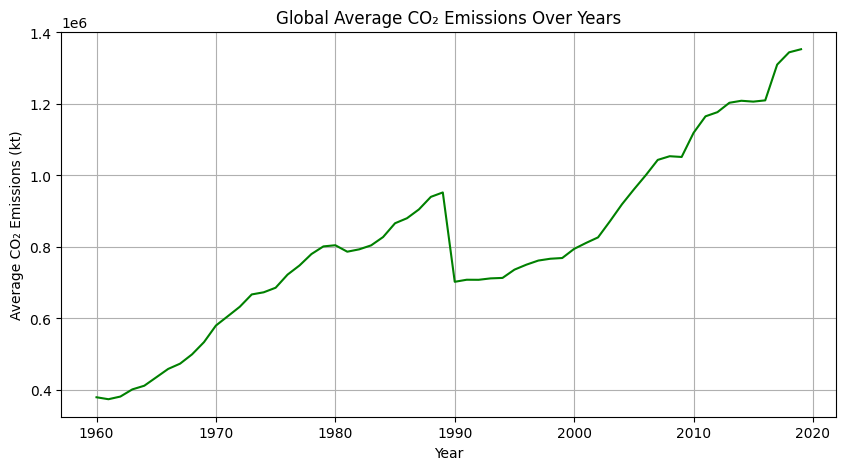


Model Evaluation:
Mean Absolute Error (MAE): 1278837.16
Mean Squared Error (MSE): 6726124881346.41
R² Score: 0.00


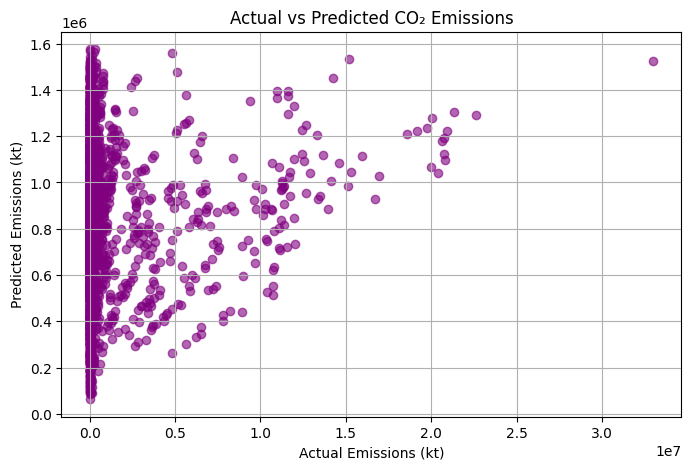


Predicted CO₂ emissions for Aruba in 2030: 1060186.23 kt


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
# ==============================
# SDG 13: Climate Action
# Predict CO₂ Emissions by Country
# ==============================

# --- Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Load dataset ---
data = pd.read_csv('/kaggle/input/co2-emissions-by-country/co2_emissions_kt_by_country.csv')

# --- Preview data ---
print("Data Preview:")
display(data.head())

print("\nData Info:")
print(data.info())

# --- Data Cleaning ---
data = data.dropna()

# Rename columns for easier reference
data = data.rename(columns={
    'country_code': 'country_code',
    'country_name': 'country_name',
    'year': 'year',
    'value': 'co2_emissions_kt'
})

# Display basic info
print(f"\nNumber of Countries: {data['country_name'].nunique()}")
print(f"Year Range: {data['year'].min()} - {data['year'].max()}")

# --- Exploratory Data Analysis ---
# Group by year and calculate average emissions
yearly_avg = data.groupby('year')['co2_emissions_kt'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='co2_emissions_kt', data=yearly_avg, color='green')
plt.title('Global Average CO₂ Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('Average CO₂ Emissions (kt)')
plt.grid(True)
plt.show()

# --- Prepare Data for Modeling ---
# Convert categorical 'country_name' to numeric codes
data['country_encoded'] = data['country_name'].astype('category').cat.codes

# Features and target variable
X = data[['country_encoded', 'year']]
y = data['co2_emissions_kt']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Train Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Make Predictions ---
y_pred = model.predict(X_test)

# --- Evaluate Model ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# --- Visualize Actual vs Predicted ---
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.title('Actual vs Predicted CO₂ Emissions')
plt.xlabel('Actual Emissions (kt)')
plt.ylabel('Predicted Emissions (kt)')
plt.grid(True)
plt.show()

# --- Predict Future Emissions for One Country ---
future_year = 2030
sample_country = data['country_name'].unique()[0]
country_code = data[data['country_name'] == sample_country]['country_encoded'].iloc[0]
future_prediction = model.predict([[country_code, future_year]])

print(f"\nPredicted CO₂ emissions for {sample_country} in {future_year}: {future_prediction[0]:.2f} kt")


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score
print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RF R2 :", r2_score(y_test, y_pred_rf))


RF MAE: 23426.601214372564
RF R2 : 0.9982909572454034


In [31]:
country = 'Kenya'   # pick any country
country_df = data[data['country_name'] == country].sort_values('year').dropna()
Xc = country_df[['year']]
yc = country_df['co2_emissions_kt']

from sklearn.model_selection import train_test_split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(Xc_train, yc_train)
yc_pred = lr.predict(Xc_test)
print(country, "R2:", r2_score(yc_test, yc_pred))


Kenya R2: 0.7978302393535925


In [32]:
country = 'Kenya'   # pick any country
country_df = data[data['country_name'] == country].sort_values('year').dropna()
Xc = country_df[['year']]
yc = country_df['co2_emissions_kt']

from sklearn.model_selection import train_test_split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(Xc_train, yc_train)
yc_pred = lr.predict(Xc_test)
print(country, "R2:", r2_score(yc_test, yc_pred))



In [33]:
print(X.columns)


Index(['country_encoded', 'year'], dtype='object')


In [34]:
# --- Predict future CO₂ emissions for Kenya (2020–2030) ---

import pandas as pd

# Kenya’s encoded value (already fitted earlier)
kenya_encoded = le.transform(['Kenya'])[0]

# Create a future dataset for Kenya — matching the correct column order
future_years = pd.DataFrame({
    'country_encoded': [kenya_encoded]*11,
    'year': range(2020, 2031)
})

# Predict future emissions
future_preds = model.predict(future_years)

# Show results
future_results = pd.DataFrame({
    'Year': future_years['year'],
    'Predicted_CO2_Emissions_kt': future_preds
})

print(future_results)


    Year  Predicted_CO2_Emissions_kt
0   2020                1.223175e+06
1   2021                1.237050e+06
2   2022                1.250924e+06
3   2023                1.264799e+06
4   2024                1.278673e+06
5   2025                1.292548e+06
6   2026                1.306423e+06
7   2027                1.320297e+06
8   2028                1.334172e+06
9   2029                1.348047e+06
10  2030                1.361921e+06


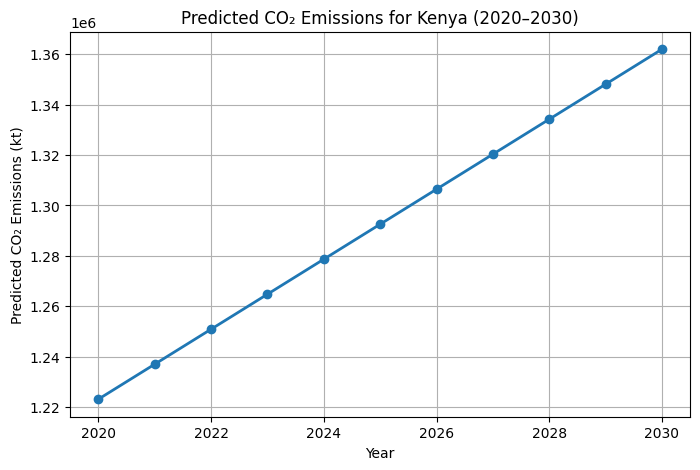

In [35]:
import matplotlib.pyplot as plt

# --- Plot the predictions ---
plt.figure(figsize=(8, 5))
plt.plot(future_results['Year'], future_results['Predicted_CO2_Emissions_kt'], marker='o', linewidth=2)
plt.title("Predicted CO₂ Emissions for Kenya (2020–2030)")
plt.xlabel("Year")
plt.ylabel("Predicted CO₂ Emissions (kt)")
plt.grid(True)
plt.show()
